In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
df['yearMonth'] = pd.to_datetime('01-' + df['month'].astype(str) + "-" + df['year'].astype(str))
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [6]:
df.set_index("yearMonth", inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

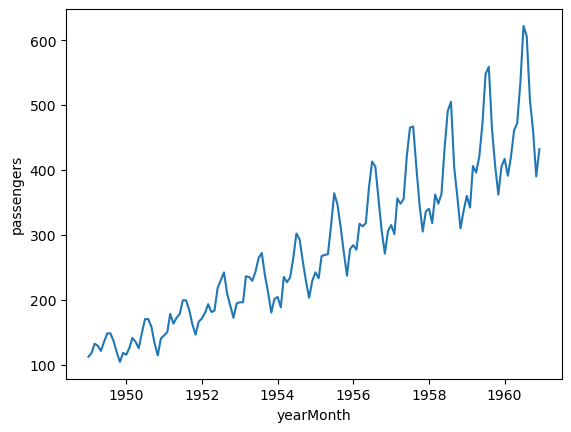

In [7]:
sns.lineplot(data=df, x=df.index, y=df.passengers)

## Classify Time Series

1. Trend
2. Seasonal
3. Cyclic
4. Irregular

### Stationarity

Mean & Variance don't vary by the time.

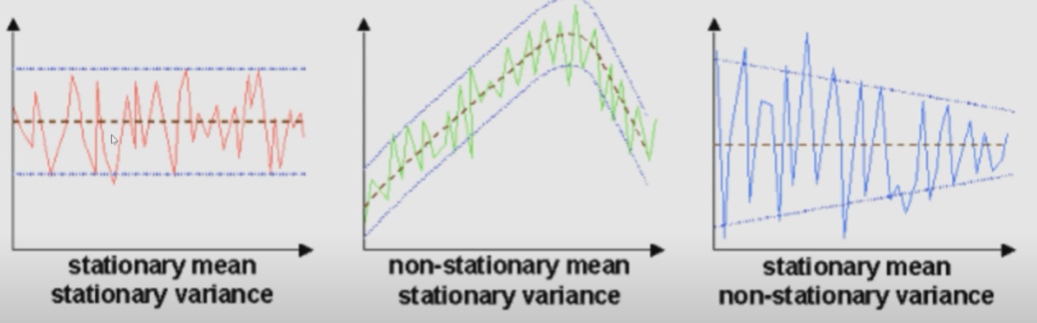

#### How to Check the Stationarity

1. ADF : Augmented Dickey-Fuller Test
    - Test Statistics < Critical Values
2. Rolling Statistics

In [8]:
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

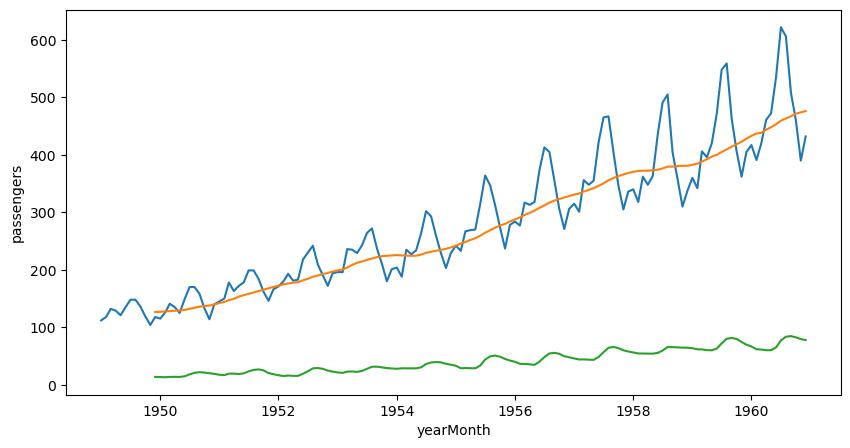

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfTest = adfuller(df['passengers'], autolag='AIC')

In [12]:
adfTest

(0.8153688792060587,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
stats = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'number of observations used'])
stats

Test Statistics                  0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [14]:
for key, values in adfTest[4].items():
    print('criticality', key, ':', values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598
